In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

ModuleNotFoundError: No module named 'scipy'

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Fri, 30 Oct 2020 15:03


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"19,439,887","18,349,410","-1,090,477",-5.61%
Collector,"3,563,588","3,093,563","-470,025",-13.19%
Freeway,"25,751,687","25,934,534","182,847",0.71%
Ramp,"29,383","23,133","-6,250",-21.27%
Total,"48,784,545","47,400,640","-1,383,905",-2.84%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"30,810,249","29,860,325","-949,924",-3.08%
Pierce,"10,706,833","10,351,682","-355,151",-3.32%
Snohomish,"7,267,463","7,188,633","-78,830",-1.08%
Total,"48,784,545","47,400,640","-1,383,905",-2.84%


----
### Daily | Scatterplots 

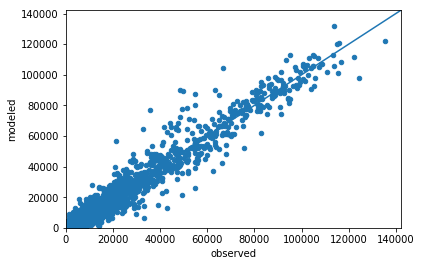

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.971424937347


---
By County

King r^2: 0.975055520211
Pierce r^2: 0.962999068132
Snohomish r^2: 0.962557133256


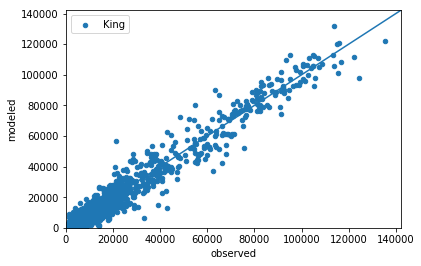

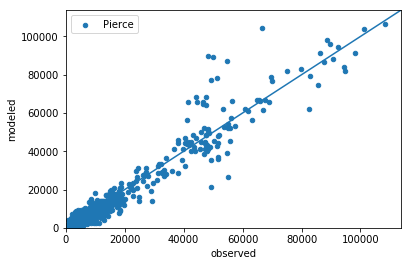

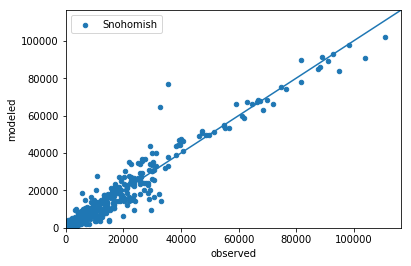

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.943423546027
r^2 Arterial: 0.87333481484


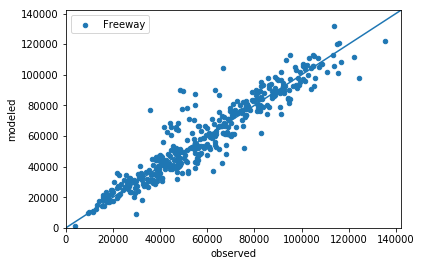

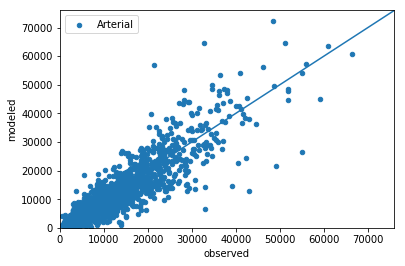

In [10]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

**Hourly Volumes**


r^2: 0.919129966185


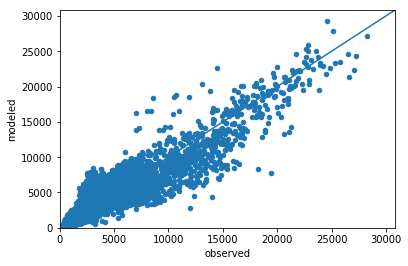

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","551,661","-16,756",-2.95%
1,KENT,"550,322","517,904","-32,418",-5.89%
2,SEATTLE - SOUTH OF CBD,"526,500","512,283","-14,217",-2.70%
3,SHIP CANAL,"519,802","552,646","32,844",6.32%
4,KIRKLAND-REDMOND,"414,120","397,468","-16,652",-4.02%
5,MILL CREEK,"400,848","399,258","-1,590",-0.40%
6,SOUTH BELLEVUE,"399,500","359,894","-39,606",-9.91%
7,SEATTLE - NORTH,"372,000","375,378","3,378",0.91%
8,TACOMA - EAST OF CBD,"312,164","334,352","22,188",7.11%
9,PARKLAND,"304,322","283,480","-20,842",-6.85%


r^2 : 0.993751956992


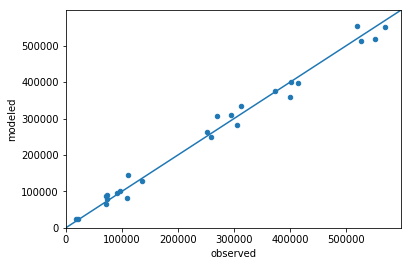

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","399,711","7,017",1.79%
5,Sound Transit,"145,426","156,291","10,866",7.47%
0,Community Transit,"30,918","34,339","3,421",11.06%
4,Pierce Transit,"27,233","33,769","6,536",24.00%
6,Washington Ferries,"16,912","11,026","-5,886",-34.80%
3,Kitsap Transit,"8,669","12,951","4,282",49.39%
1,Everett Transit,"3,290","1,902","-1,389",-42.21%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF West Seattle - S,"1,356",745,-611,-45.08%
1,POF Vashon Island -,670,500,-169,-25.27%
2,WSF Kingston - Edmon,"1,732",479,"-1,253",-72.34%
3,WSF Bainbridge Islan,"8,857","7,570","-1,286",-14.52%
4,WSF Bremerton - Seat,"4,484","1,181","-3,303",-73.67%
5,WSF Fauntleroy - Sou,365,30,-335,-91.77%
6,WSF Vashon Island -,946,"1,221",275,29.05%
7,WSF Southworth - Vas,239,248,10,4.02%
8,WSF Point Defiance -,289,297,8,2.81%


r^2 : 0.927160444287


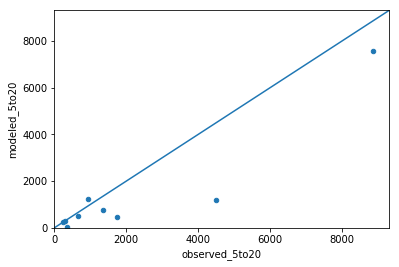

In [16]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,946
1,1975,POF Vashon Island -,742
2,4200,POF Seattle - Bremer,651
4,4202,POF Bremerton - Anna,551
3,4201,POF Bremerton - Pt O,543
7,5003,WSF Bremerton - Seat,397
8,5005,WSF Vashon Island -,222
9,5006,WSF Southworth - Vas,203
6,5002,WSF Bainbridge Islan,187
10,5007,WSF Point Defiance -,167


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","73,481","4,098",5.91%
1,Sounder South,"15,356","14,268","-1,088",-7.09%
2,Sounder North,"1,667","1,788",121,7.26%


r^2 : 0.99958822207


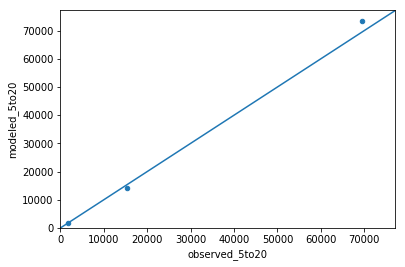

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","14,849",-487,-3.18%
4,C Line RapidRide,"11,368","12,703","1,335",11.74%
1,KC Metro 40,"11,405","12,242",837,7.34%
10,Sound Transit 550,"9,168","11,103","1,935",21.11%
0,KC Metro 7,"10,150","10,476",326,3.21%
5,D Line RapidRide,"13,078","9,349","-3,729",-28.51%
2,A Line RapidRide,"8,522","8,504",-18,-0.21%
7,F Line RapidRide,"5,267","7,680","2,413",45.82%
3,B Line RapidRide,"5,914","5,636",-278,-4.70%
8,SLU Streetcar,"1,703","1,483",-220,-12.94%


r^2 : 0.912986898645


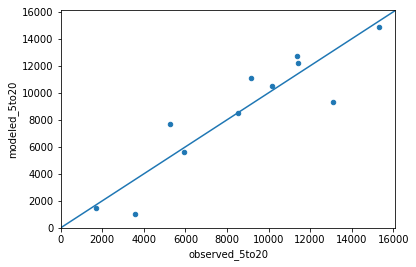

In [21]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.883573543091
r^2 Everett Transit: -0.371108359494
r^2 King County Metro: 0.93272922628
r^2 Kitsap Transit: 0.807936786135
r^2 Pierce Transit: 0.872715445276
r^2 Sound Transit: 0.997659991933
r^2 Washington Ferries: 0.925458273988


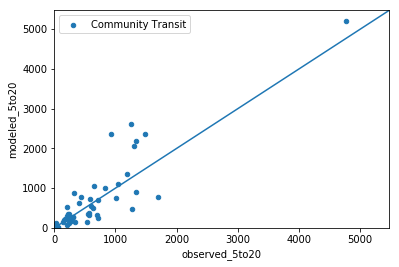

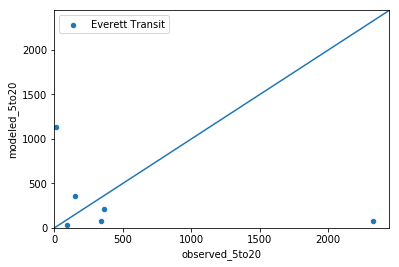

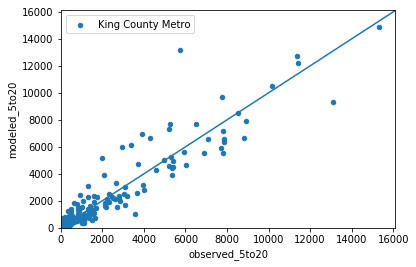

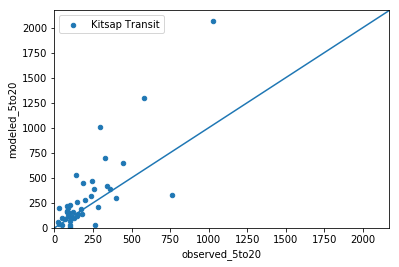

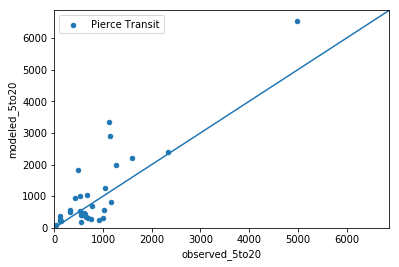

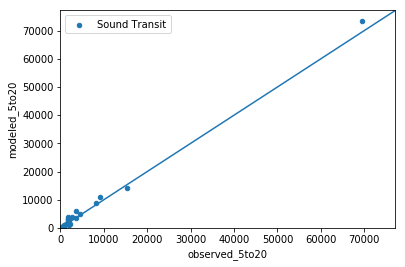

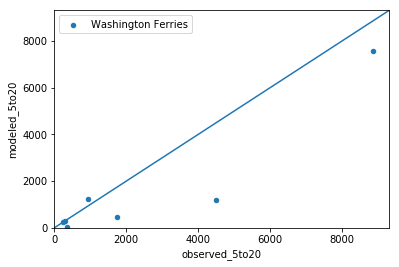

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","11,066","1,650",17.53%
Westlake,"10,904","8,091","-2,813",-25.80%
University St,"5,257","6,143",886,16.86%
Pioneer Square,"3,865","5,918","2,053",53.13%
Int'l District,"5,647","3,386","-2,261",-40.04%
Capitol Hill,"7,016","7,811",794,11.32%
Stadium,"1,912",845,"-1,067",-55.81%
SODO,"2,108","3,723","1,615",76.63%
Beacon Hill,"2,587","2,226",-361,-13.96%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","11,066","1,650",17.53%
Capitol Hill,"7,016","7,811",794,11.32%
Westlake/University St,"16,161","14,234","-1,926",-11.92%
Pioneer Square/Int'l District,"9,512","9,305",-208,-2.18%
Stadium/SODO,"4,020","4,568",548,13.62%
Beacon Hill/Mount Baker,"4,809","4,761",-48,-1.00%
Columbia City,"2,376","2,489",113,4.75%
Othello/Rainier Beach,"4,412","5,384",972,22.03%
Tukwila Int'l Blvd,"2,779","3,411",632,22.75%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.28,-99.00,99.28,-100.28%
Westlake,0.43,0.36,0.06,17.70%
University St,0.59,0.20,0.39,192.89%
Pioneer Square,0.53,0.16,0.38,236.47%
Int'l District,0.73,0.45,0.28,62.76%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.31,0.12,0.19,161.39%
SODO,0.40,0.31,0.09,28.76%
Beacon Hill,0.34,0.35,-0.01,-2.74%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","133,610","3,610",2.78%
I-5 to Mount Vernon,3744,"67,000","60,206","-6,794",-10.14%
I-90 @ Snoqualmie Pass,3739,"33,000","30,650","-2,350",-7.12%
SR-532 to Camano Island,3746,"23,000","20,921","-2,079",-9.04%
SR-507 to Yelm,3734,"23,000","20,757","-2,243",-9.75%
SR-3 to Belfair,3749,"18,000","17,227",-773,-4.30%
Hood Canal Bridge,3748,"18,000","17,177",-823,-4.57%
SR-530 N/O Stanwood,3745,"9,100","8,693",-407,-4.47%
Mukilteo-Clinton Ferry,3747,"6,300","6,334",34,0.54%


# Corridor Speed

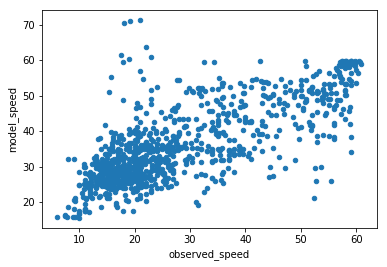

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

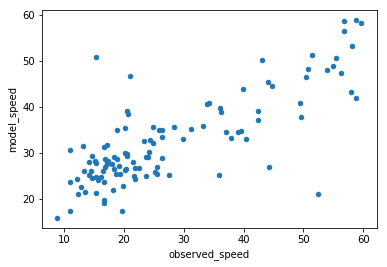

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,43,58
16,Everett to Seattle - SB,25,28
25,Tacoma to Seattle - NB,27,26
34,Seattle to Tacoma - SB,42,59
43,Bellevue to Lynnwood - NB,47,56
52,Lynnwood to Bellevue - SB,25,24
61,Tukwila to Bellevue - NB,27,19
70,Bellevue to Tukwila - SB,27,44
79,Auburn to Renton - NB,29,24
88,Renton to Auburn - SB,51,55


### PM Peak, Primary Corridors

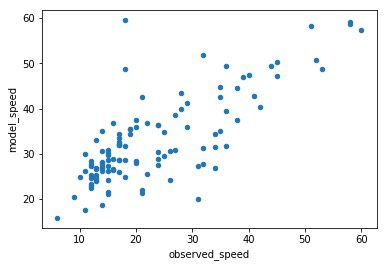

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:

df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,28,24
11,Everett to Seattle - SB,40,28
20,Tacoma to Seattle - NB,40,42
29,Seattle to Tacoma - SB,31,27
38,Bellevue to Lynnwood - NB,29,24
47,Lynnwood to Bellevue - SB,43,41
56,Tukwila to Bellevue - NB,28,32
65,Bellevue to Tukwila - SB,28,20
74,Auburn to Renton - NB,49,44
83,Renton to Auburn - SB,31,32
